In [6]:
import pymongo
import numpy as np

from pymongo import MongoClient

import pandas as pd
from pandas.io.json import json_normalize
import plotly.plotly as py
import plotly.graph_objs as go

from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt


In [7]:
client = MongoClient('54.186.107.70', 27017)

db = client['microservice_vm_linearIncrease']
collection_name = 'loadtestmodels'


In [8]:
datapoints = list(db.loadtestmodels.find({}))

In [20]:
df = json_normalize(datapoints)
df2 = json_normalize(datapoints)

In [16]:
df['time'] = pd.to_datetime(df['time'],unit='ms')

In [17]:
df2['requestElapsedS'] = pd.to_numeric(df2['requestElapsedS'], downcast='float')
df2['requestIndexS'] = pd.to_numeric(df2['requestIndexS'], downcast='float')
df2['instanceIndexS'] = pd.to_numeric(df2['instanceIndexS'], downcast='float')

In [18]:
df2.head()

,__v,_id,errorS,instanceIndexS,latencyS.errorCodes.-1,latencyS.maxLatencyMs,latencyS.meanLatencyMs,latencyS.minLatencyMs,latencyS.percentiles.50,latencyS.percentiles.90,...,resultS.headers.etag,resultS.headers.x-powered-by,resultS.host,resultS.instanceIndex,resultS.method,resultS.path,resultS.requestElapsed,resultS.requestIndex,resultS.statusCode,time
0,0,5a5749ef902f25000190becd,None,0.0,NaN,29,29.3,29,29,29,...,"W/""1c-hudkmJpsNjwFEpW92L1X5wqO2e4""",Express,NaN,0.0,GET,/,29.280401,0.0,200.0,2018-01-11 11:26:39.823
1,0,5a5749f0902f25000190bece,None,1.0,NaN,29,29.3,29,29,29,...,"W/""1c-hudkmJpsNjwFEpW92L1X5wqO2e4""",Express,NaN,1.0,GET,/,29.336536,0.0,200.0,2018-01-11 11:26:40.708
2,0,5a5749f0902f25000190bed0,None,1.0,NaN,29,26.7,24,29,29,...,"W/""1c-hudkmJpsNjwFEpW92L1X5wqO2e4""",Express,NaN,1.0,GET,/,24.089050,1.0,200.0,2018-01-11 11:26:40.849
3,0,5a5749f1902f25000190bed2,None,2.0,NaN,24,25.0,24,24,24,...,"W/""1c-hudkmJpsNjwFEpW92L1X5wqO2e4""",Express,NaN,2.0,GET,/,24.987958,0.0,200.0,2018-01-11 11:26:41.842
4,0,5a5749f2902f25000190bed4,None,2.0,NaN,27,25.6,24,24,27,...,"W/""1c-hudkmJpsNjwFEpW92L1X5wqO2e4""",Express,NaN,2.0,GET,/,24.496453,2.0,200.0,2018-01-11 11:26:42.458


AttributeError: 'numpy.datetime64' object has no attribute 'toordinal'

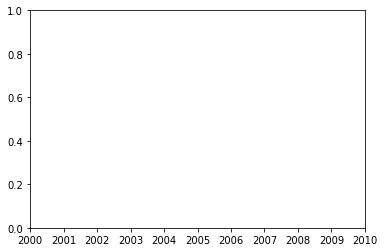

In [19]:
plt.plot_date(x=df2['time'], y=df2['requestElapsedS'], fmt="r-")
plt.title("Request Elapsed Seconds")
plt.ylabel("Request Seconds")
plt.grid(True)
plt.show()

AttributeError: 'numpy.datetime64' object has no attribute 'toordinal'

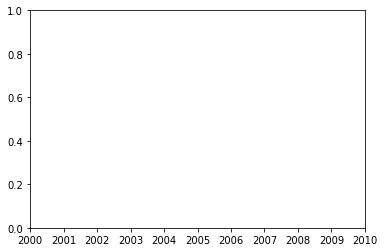

In [15]:
plt.plot_date(x=df['time'], y=df['requestIndexS'], fmt="r-")
plt.title("Request Index")
plt.ylabel("Request Index")
plt.grid(True)
plt.show()

In [ ]:
plt.plot_date(x=df['time'], y=df['resultS.requestIndex'], fmt="r-")
plt.title("Request Index")
plt.ylabel("Request Index")
plt.grid(True)
plt.show()

In [ ]:
plt.plot_date(x=df['time'], y=df['instanceIndexS'], fmt="r-")
plt.title("Instance Index")
plt.ylabel("Instance Index")
plt.grid(True)
plt.show()

In [ ]:
plt.plot_date(x=df['time'], y=df['resultS.instanceIndex'], fmt="r-")
plt.title("Instance Index")
plt.ylabel("Instance Index")
plt.grid(True)
plt.show()

In [ ]:
plt.plot_date(x=df['time'], y=df['latencyS.totalErrors'], fmt="r-")
plt.title("Total Errors")
plt.ylabel("Errors Number")
plt.grid(True)
plt.show()

In [ ]:
plt.plot_date(x=df['time'], y=df['latencyS.totalRequests'], fmt="r-")
plt.title("Total Requests")
plt.ylabel("Requests Number")
plt.grid(True)
plt.show()

In [ ]:
plt.plot_date(x=df['time'], y=df['latencyS.totalTimeSeconds'], fmt="r-")
plt.title("Total TimeSeconds")
plt.ylabel("TimeSeconds")
plt.grid(True)
plt.show()

In [ ]:
plt.plot_date(x=df['time'], y=df['latencyS.minLatencyMs'], fmt="r-")
plt.plot_date(x=df['time'], y=df['latencyS.maxLatencyMs'], fmt="y-")
plt.plot_date(x=df['time'], y=df['latencyS.meanLatencyMs'], fmt="g-")
plt.title("Latency")
plt.ylabel("Latency MS")
plt.grid(True)
plt.show()

In [ ]:
plt.plot_date(x=df['time'], y=df['latencyS.rps'], fmt="r-")
plt.title("RPS")
plt.ylabel("RPS")
plt.grid(True)
plt.show()